In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
import os 
os.chdir('C:\\College\\Machine Learnings\\Part 3 - Classification\\Section 14 - Logistic Regression\\Logistic_Regression')
os.getcwd()

'C:\\College\\Machine Learnings\\Part 3 - Classification\\Section 14 - Logistic Regression\\Logistic_Regression'

In [3]:
social_ntw = pd.read_csv('Social_Network_Ads.csv')
social_ntw.head(n=1)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0


In [4]:
## Missing values in dataset ##########
social_ntw[social_ntw[ 'User ID'].isna()]
social_ntw[social_ntw[ 'Gender'].isna()]
social_ntw[social_ntw[ 'Age'].isna()]
social_ntw[social_ntw[ 'EstimatedSalary'].isna()]
social_ntw[social_ntw[ 'Purchased'].isna()]

,User ID,Gender,Age,EstimatedSalary,Purchased


In [12]:
social_ntw.loc[social_ntw['Purchased']==1,'Purchased'] = 'Yes'
social_ntw.loc[social_ntw['Purchased']==0,'Purchased'] = 'No'

In [13]:
social_ntw.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,No
1,15810944,Male,35,20000,No
2,15668575,Female,26,43000,No
3,15603246,Female,27,57000,No
4,15804002,Male,19,76000,No


In [14]:
### Imp variables are as follows Gender Age and Salary in X and Purchased in Y
### Handle categorical variables
X = social_ntw.iloc[:,1:4].values
Y = social_ntw.iloc[:,4:] .values
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [15]:
labelencoder = LabelEncoder()
X[:,0]=labelencoder.fit_transform(X[:,0])
onehotencoder =OneHotEncoder(categorical_features=[0])
#Y[:,0]=labelencoder.fit_transform(Y[:,0:])


In [16]:
######## Train set and Test set
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,random_state=0,test_size=0.2)

In [17]:
### Feature Scaling ########################
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_train_set = confusion_matrix(Y_train,classifier.predict(X_train))

In [20]:
confusion_train_set


array([[181,  18],
       [ 37,  84]], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_test_Set =confusion_matrix(Y_test,classifier.predict(X_test))

In [22]:
confusion_test_Set

array([[56,  2],
       [ 4, 18]], dtype=int64)

In [23]:
classifier.predict(X_test)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes'], dtype=object)

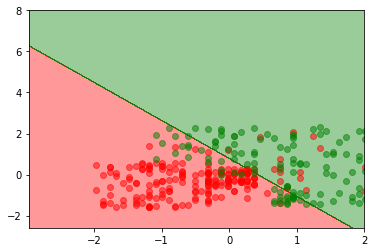

In [27]:
Y_train_new = labelencoder.fit_transform(Y_train)
Y_train_new.reshape((len(Y_train_new),1))
from sklearn.linear_model import LogisticRegression
classifier_new = LogisticRegression(random_state=0)
classifier_new.fit(X_train[:,1:],Y_train_new)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

from matplotlib.colors import ListedColormap
X_set,Y_set = X_train[:,1:],Y_train_new
X1,X2 = np.meshgrid(np.arange(X_set[:,0].min()-1,X[:,0].max() + 1,0.01),
                     np.arange(X_set[:,1].min()-1,X[:,1].max() + 1,0.01))
plt.contourf(X1,X2,classifier_new.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),cmap=ListedColormap(('red','green')),alpha=0.4)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),8)
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(x= X_set[Y_set == j,0],y=X_set[Y_set == j,1],c= ListedColormap(('red','green'))(i),label=j,alpha=0.5)
plt.show()

In [28]:
from sklearn.metrics import classification_report
Classification_report =classification_report(Y_train,classifier.predict(X_train))

In [29]:
Classification_report

'             precision    recall  f1-score   support\n\n         No       0.83      0.91      0.87       199\n        Yes       0.82      0.69      0.75       121\n\navg / total       0.83      0.83      0.82       320\n'

In [33]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(classifier,X_train,classifier.predict(X_train),scoring='accuracy',n_jobs=-1,cv=15)
accuracy.mean()

0.9783405483405484